In [77]:
import json

import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime, date

import seaborn as sns
import matplotlib.pyplot as plt

printing.init_printing(use_latex=True)
from sympy import Eq, solve_linear_system, Matrix
from numpy import linalg
import sympy as sp
from sympy.interactive import printing

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None #catch SettingCopyWarning

json_file_path = "/Users/aianellenado/Documents/ITMGT 25/ad-hoc/transaction-data-adhoc-analysis.json"
    
df = pd.read_json (r'/Users/aianellenado/Documents/ITMGT 25/ad-hoc/transaction-data-adhoc-analysis.json')

In [78]:
# convert transaction date from string to datetime value
df['transaction_date']= pd.to_datetime(df['transaction_date'])
# extract transaction month and convert to month name
df['Transaction Month'] = pd.to_datetime(df['transaction_date']).dt.month
df['Transaction Month'] = pd.to_datetime(df['Transaction Month'], format='%m').dt.month_name()
df[['Transaction Month','transaction_items','transaction_value']]
# split transaction_items
df[['Item_1', 'Item_2', 'Item_3']] = df['transaction_items'].str.split(';', expand=True)
# split item 1
df[['Item1_Name1', 'Item1_Name2', 'Item1_Q']] = df['Item_1'].str.split(',', expand=True)
# split item 2
df[['Item2_Name1', 'Item2_Name2', 'Item2_Q']] = df['Item_2'].str.split(',', expand=True)
# split item 3
df[['Item3_Name1', 'Item3_Name2', 'Item3_Q']] = df['Item_3'].str.split(',', expand=True)
# concat item 1
df['Item1_Final'] = df['Item1_Name1']+ ', ' + df['Item1_Name2']
# concat item 2
df['Item2_Final'] = df['Item2_Name1']+ ', ' + df['Item2_Name2']
# concat item 3
df['Item3_Final'] = df['Item3_Name1']+ ', ' + df['Item3_Name2']

# convert null values to 0 
df['Item2_Q2'] = df['Item2_Q'].fillna('0')
df['Item3_Q2'] = df['Item3_Q'].fillna('0')

# extract the integer values in each transaction that represents the quantity
def convert_items (y):
    charset = [*[str(i) for i in range(10)]]
    y = ','.join([x for x in y if x in charset])
    return int(y)

df['Item1_Quantity'] = df['Item1_Q'].apply(convert_items)
df['Item2_Quantity'] = df['Item2_Q2'].apply(convert_items)
df['Item3_Quantity'] = df['Item3_Q2'].apply(convert_items)


df_clean = df[['transaction_date','Transaction Month','name','username','birthdate','sex','Item1_Final','Item1_Quantity','Item2_Final','Item2_Quantity','Item3_Final','Item3_Quantity','transaction_value']]

In [79]:
df_clean

,transaction_date,Transaction Month,name,username,birthdate,sex,Item1_Final,Item1_Quantity,Item2_Final,Item2_Quantity,Item3_Final,Item3_Quantity,transaction_value
0,2022-01-12,January,Jennifer Campbell,veronicawells,1926/03/11,F,"Exotic Extras, Beef Chicharon",4,NaN,0,NaN,0,5196
1,2022-01-12,January,Melissa Kim,cgilbert,2016/07/08,F,"Exotic Extras, Beef Chicharon",3,"HealthyKid 3+, Nutrional Milk",4,"Candy City, Orange Beans",1,12056
2,2022-01-08,January,Melissa Kim,cgilbert,2016/07/08,F,"HealthyKid 3+, Gummy Vitamins",3,"HealthyKid 3+, Yummy Vegetables",2,NaN,0,5500
3,2022-01-10,January,Melissa Kim,cgilbert,2016/07/08,F,"HealthyKid 3+, Yummy Vegetables",1,NaN,0,NaN,0,500
4,2022-01-24,January,Kristen Cooper,qhernandez,1949/09/27,F,"Candy City, Orange Beans",3,"Candy City, Gummy Worms",4,"HealthyKid 3+, Gummy Vitamins",1,2697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,2022-06-05,June,Tammy Byrd,kmcconnell,2019/10/26,F,"Exotic Extras, Kimchi and Seaweed",2,"HealthyKid 3+, Nutrional Milk",1,NaN,0,3588
83032,2022-06-12,June,Donald Andersen,llowe,1913/11/04,M,"HealthyKid 3+, Yummy Vegetables",1,"Exotic Extras, Kimchi and Seaweed",1,"Candy City, Orange Beans",4,2095
83033,2022-06-15,June,Donald Andersen,llowe,1913/11/04,M,"Candy City, Orange Beans",4,"Candy City, Gummy Worms",4,"HealthyKid 3+, Yummy Vegetables",4,3396
83034,2022-06-09,June,Donald Andersen,llowe,1913/11/04,M,"HealthyKid 3+, Nutrional Milk",2,"Candy City, Gummy Worms",2,NaN,0,4280


# Breakdown of Count of Each Item per Month

In [80]:
quantity_per_item_num = df_clean.groupby(['Transaction Month','Item1_Final'],sort=False).agg({'Item1_Quantity':sum,'Item2_Quantity':sum,'Item3_Quantity':sum}).reset_index()
quantity_per_item_num.rename(columns = {'Item1_Final':'Item Name'}, inplace=True)
total_quantity_per_item = ['Item1_Quantity','Item2_Quantity', 'Item3_Quantity']

quantity_per_item_num['Total Quantity Sold per Item'] = quantity_per_item_num[total_quantity_per_item].sum(axis=1)

quantity_per_item_num.drop(['Item1_Quantity','Item2_Quantity', 'Item3_Quantity'], axis=1, inplace=True)

#breakdown of count per item per month 
quantity_per_item_num

,Transaction Month,Item Name,Total Quantity Sold per Item
0,January,"Exotic Extras, Beef Chicharon",9855
1,January,"HealthyKid 3+, Gummy Vitamins",9577
2,January,"HealthyKid 3+, Yummy Vegetables",10113
3,January,"Candy City, Orange Beans",9814
4,January,"HealthyKid 3+, Nutrional Milk",9529
5,January,"Exotic Extras, Kimchi and Seaweed",9653
6,January,"Candy City, Gummy Worms",9500
7,February,"HealthyKid 3+, Gummy Vitamins",10310
8,February,"Exotic Extras, Beef Chicharon",10327
9,February,"HealthyKid 3+, Yummy Vegetables",9782


# Breakdown of Total Sale Value per Item per Month

In [82]:
# Used Sympy to solve 
eq_jan1 = sp.Function('eq_jan1')
eq_jan2 = sp.Function('eq_jan2')
eq_jan3 = sp.Function('eq_jan3')
eq_jan4 = sp.Function('eq_jan4')
eq_jan5 = sp.Function('eq_jan5')
eq_jan6 = sp.Function('eq_jan6')
eq_jan7 = sp.Function('eq_jan7')

BC, NM, OB, GV, YV, GW, KS = sp.symbols('BC NM OB GV YV GW KS')

eq1_jan = Eq(4*BC, 5196) 
eq2_jan = Eq(3*BC + 4*NM + OB, 12056)
eq3_jan = Eq(3*GV + 2*YV, 5500)
eq4_jan = Eq(YV, 500)
eq5_jan = Eq(3*OB + 4*GW + GV, 2697)
eq6_jan = Eq(NM + 2*YV, 2990)
eq7_jan = Eq(4*KS, 3196)

row1_jan = [4,0,0,0,0,0,0,5196]
row2_jan = [3,4,1,0,0,0,0,12056]
row3_jan = [0,0,0,3,2,0,0,5500]
row4_jan = [0,0,0,0,1,0,0,500]
row5_jan = [0,0,3,1,0,4,0,2697]
row6_jan = [0,1,0,0,2,0,0,2990]
row7_jan = [0,0,0,0,0,0,4,3196]

system = Matrix((row1_jan, row2_jan, row3_jan, row4_jan, row5_jan, row6_jan, row7_jan))

display(eq1_jan)
display(eq2_jan)
display(eq3_jan)
display(eq4_jan)
display(eq5_jan)
display(eq6_jan)
display(eq7_jan)

display(system)

item_cost = solve_linear_system(system, BC, NM, OB, GV, YV, GW, KS)
item_cost

⎡4  0  0  0  0  0  0  5196 ⎤
⎢                          ⎥
⎢3  4  1  0  0  0  0  12056⎥
⎢                          ⎥
⎢0  0  0  3  2  0  0  5500 ⎥
⎢                          ⎥
⎢0  0  0  0  1  0  0   500 ⎥
⎢                          ⎥
⎢0  0  3  1  0  4  0  2697 ⎥
⎢                          ⎥
⎢0  1  0  0  2  0  0  2990 ⎥
⎢                          ⎥
⎣0  0  0  0  0  0  4  3196 ⎦

In [83]:
# assigned variable names to the items through mapping
item_dict = {'Exotic Extras, Beef Chicharon': 'BC', 'HealthyKid 3+, Gummy Vitamins': 'GV', 'HealthyKid 3+, Yummy Vegetables': 'YV', 'Candy City, Orange Beans': 'OB','HealthyKid 3+, Nutrional Milk': 'NM',
'Exotic Extras, Kimchi and Seaweed': 'KS', 'Candy City, Gummy Worms': 'GW'}
quantity_per_item_num['Item_Var'] = quantity_per_item_num['Item Name'].map(item_dict).fillna('X')

# assigned item costs to the variable names through mapping 
Item_Cost = {'BC': 1299, 'GV': 1500, 'GW': 150, 'KS': 799, 'NM': 1990, 'OB': 199, 'YV': 500}
quantity_per_item_num['Item Cost'] = quantity_per_item_num['Item_Var'].map(Item_Cost)

quantity_per_item_num['Total Sale Value per Item'] = quantity_per_item_num['Item Cost']*quantity_per_item_num['Total Quantity Sold per Item']
total_sale_value = quantity_per_item_num[['Transaction Month', 'Item Name', 'Item Cost', 'Total Quantity Sold per Item', 'Total Sale Value per Item']]
total_sale_value

,Transaction Month,Item Name,Item Cost,Total Quantity Sold per Item,Total Sale Value per Item
0,January,"Exotic Extras, Beef Chicharon",1299,9855,12801645
1,January,"HealthyKid 3+, Gummy Vitamins",1500,9577,14365500
2,January,"HealthyKid 3+, Yummy Vegetables",500,10113,5056500
3,January,"Candy City, Orange Beans",199,9814,1952986
4,January,"HealthyKid 3+, Nutrional Milk",1990,9529,18962710
5,January,"Exotic Extras, Kimchi and Seaweed",799,9653,7712747
6,January,"Candy City, Gummy Worms",150,9500,1425000
7,February,"HealthyKid 3+, Gummy Vitamins",1500,10310,15465000
8,February,"Exotic Extras, Beef Chicharon",1299,10327,13414773
9,February,"HealthyKid 3+, Yummy Vegetables",500,9782,4891000


## Total Sale Value per Month Bar Graph

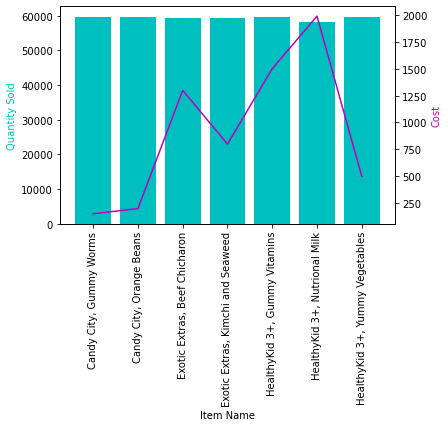

In [94]:
cost = total_sale_value.groupby('Item Name').mean()['Item Cost']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(items, quantity_sold, color = 'c')
ax2.plot(items, cost, 'm-')

ax1.set_xlabel('Item Name')
ax1.set_ylabel('Quantity Sold', color = 'c')
ax2.set_ylabel('Cost', color = 'm')
ax1.set_xticklabels(items, rotation = 'vertical', size = 10)

plt.show()

# Additional Metrics

## Cohort Counts Table

In [86]:
#creating the cohort table
def get_month(x): return dt.datetime(x.year, x.month, 1)
df_clean['Transaction Month (Day 1)'] = df_clean['transaction_date'].apply(get_month)
grouping = df_clean.groupby('username')['Transaction Month (Day 1)']
df_clean['Cohort Month'] = grouping.transform('min')

def get_date_int(df_clean, column):
    year = df_clean[column].dt.year
    month = df_clean[column].dt.month
    day = df_clean[column].dt.day
    return year, month, day

purchase_year, purchase_month, _ = get_date_int(df_clean, 'Transaction Month (Day 1)')
cohort_year, cohort_month, _ = get_date_int(df_clean, 'Cohort Month')
years_diff = purchase_year - cohort_year
months_diff = purchase_month - cohort_month
df_clean['Cohort Index'] = years_diff * 12 + months_diff
df_clean.head()

grouping = df_clean.groupby(['Cohort Month', 'Cohort Index'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'Cohort Month',
                                  columns = 'Cohort Index',
                                  values = 'username')

cohort_counts_final = cohort_counts.rename(index=lambda x: x.strftime('%B'))
cohort_counts_final

Cohort Index,0,1,2,3,4,5
Cohort Month,,,,,,
January,6583.0,5167.0,5220.0,5152.0,5143.0,5189.0
February,1463.0,1098.0,1065.0,1092.0,1126.0,NaN
March,340.0,257.0,254.0,257.0,NaN,NaN
April,94.0,76.0,74.0,NaN,NaN,NaN
May,22.0,16.0,NaN,NaN,NaN,NaN
June,3.0,NaN,NaN,NaN,NaN,NaN


## Customer Retention Table

In [87]:
cohort_sizes = cohort_counts_final.iloc[:,0]
retention = cohort_counts_final.divide(cohort_sizes, axis = 0)
retention.round(3)*100

Cohort Index,0,1,2,3,4,5
Cohort Month,,,,,,
January,100.0,78.5,79.3,78.3,78.1,78.8
February,100.0,75.1,72.8,74.6,77.0,NaN
March,100.0,75.6,74.7,75.6,NaN,NaN
April,100.0,80.9,78.7,NaN,NaN,NaN
May,100.0,72.7,NaN,NaN,NaN,NaN
June,100.0,NaN,NaN,NaN,NaN,NaN


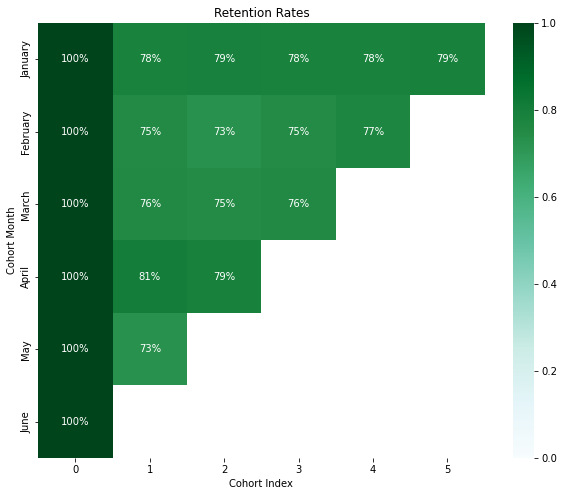

In [88]:
plt.figure(figsize=(10,8))
plt.title('Retention Rates')
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 1,
            cmap = 'BuGn')
plt.show()

### Generating Correlation Data

In [89]:
def age(born):
    born = datetime.strptime(born, "%Y/%m/%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_clean['Age'] = df_clean['birthdate'].apply(age)
df_clean['sex'].replace('F', 0,inplace=True)
df_clean['sex'].replace('M', 1,inplace=True)

df_clean.shape
df_clean.describe()

,sex,Item1_Quantity,Item2_Quantity,Item3_Quantity,transaction_value,Cohort Index,Age
count,83036.000000,83036.000000,83036.000000,83036.000000,83036.000000,83036.000000,83036.000000
mean,0.504155,2.495496,1.668975,0.835168,4590.211137,2.283130,58.022255
std,0.499986,1.116037,1.491487,1.346640,3283.631587,1.707967,33.888619
min,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1950.000000,1.000000,29.000000
50%,1.000000,2.000000,1.000000,0.000000,3994.000000,2.000000,58.000000
75%,1.000000,3.000000,3.000000,2.000000,6600.000000,4.000000,88.000000
max,1.000000,4.000000,4.000000,4.000000,19156.000000,5.000000,116.000000


In [90]:
df_clean.corr()

,sex,Item1_Quantity,Item2_Quantity,Item3_Quantity,transaction_value,Cohort Index,Age
sex,1.000000,-0.001898,0.001836,-0.002820,0.002755,0.005208,0.011031
Item1_Quantity,-0.001898,1.000000,-0.006347,-0.004713,0.308764,-0.002117,0.005971
Item2_Quantity,0.001836,-0.006347,1.000000,0.345604,0.548679,0.002716,-0.004057
Item3_Quantity,-0.002820,-0.004713,0.345604,1.000000,0.523689,0.007991,-0.002803
transaction_value,0.002755,0.308764,0.548679,0.523689,1.000000,0.005552,0.002892
Cohort Index,0.005208,-0.002117,0.002716,0.007991,0.005552,1.000000,-0.000122
Age,0.011031,0.005971,-0.004057,-0.002803,0.002892,-0.000122,1.000000


## Correlation Heatmap

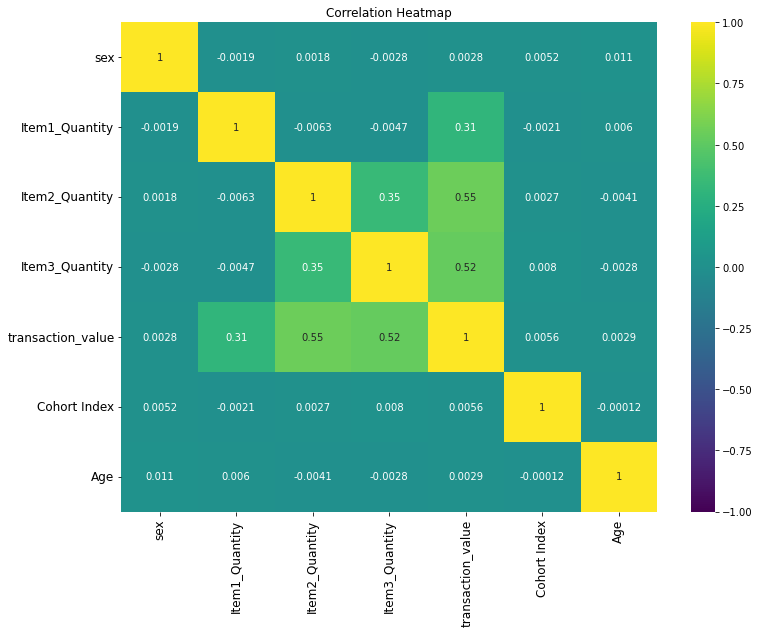

In [91]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_clean.corr(),
                annot = True,
                cmap = 'viridis',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()